# Dataset Preprocessing Steps

## 1. Importing Required Libraries
We import the necessary libraries:
- `pandas` for data manipulation and analysis.
- `re` for regular expressions to clean text.
- `matplotlib.pyplot` and `seaborn` for visualization.
- `tensorflow.keras` for text tokenization and sequence padding.
- `joblib` for saving models and `sklearn.feature_extraction.text` for text vectorization.


## 2. Load Dataset
Load the dataset `merged_dataset.csv` using pandas and display the first few rows to understand its structure.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("merged_dataset.csv")
df.head()

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


### Dataset Information and Summary Statistics
- `info()` provides information about columns, data types, and non-null values.
- `describe()` generates summary statistics for numerical columns.

In [2]:
# General information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [3]:
# Summary statistics for numerical columns (if any)
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


## 3. Handling Missing Values and Duplicates
### Check and Remove Missing Values
- `isnull().sum()` identifies columns with missing values.
- `dropna()` removes rows containing missing values.

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [5]:
# Drop rows with missing values
df = df.dropna()

# Count of missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
Text        0
Language    0
dtype: int64


### Check and Remove Duplicate Rows
- `duplicated().sum()` counts duplicate rows.
- `drop_duplicates()` removes duplicates.

In [6]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 207


In [7]:
# Drop duplicates
df = df.drop_duplicates()

# Count duplicates after handling
print("\nDuplicate Rows After Handling:", df.duplicated().sum())


Duplicate Rows After Handling: 0


## 4. Cleaning Text Data
A custom clean_text function performs the following:

1. Removes backslashes and line breaks.
2. Removes special characters and numbers.
3. Strips leading and trailing spaces.
Text is converted to lowercase using `.str.lower()` for uniformity.

In [8]:
import re

# Function to clean text
def clean_text(text):
    # Remove backslashes, line breaks, and extra whitespaces
    text = re.sub(r'\\', '', text)       # Remove backslashes
    text = re.sub(r'\n', ' ', text)      # Replace line breaks with a space
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space
    
    # Remove special characters except for non-English text
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # Remove leading and trailing whitespaces
    text = text.strip()
    
    return text

# Apply text cleaning to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Convert text to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()

## 5. Displaying Dataset Snapshots
### Original and Cleaned Text Snapshots
Snapshots of the dataset are displayed before and after preprocessing.

In [9]:
print("\nInitial Dataset:")
print(df[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(df[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot


Initial Dataset:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

After Preprocessing:
                                        Cleaned_Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


### Subset View
Display and preprocess a specific range of rows (21861 to 32132).

In [10]:
# Display rows 21861 to 32132 
subset = df[21861:32132]
print(subset)

                                                    Text Language  \
22002  The study of nature is a large, if not the onl...  English   
22003  Although humans are part of nature, human acti...  English   
22004  [1] The word nature is borrowed from the Old F...  English   
22005  [2] In ancient philosophy, natura is mostly us...  English   
22006  [3][4] \nThe concept of nature as a whole, the...  English   
...                                                  ...      ...   
32332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada   
32333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada   
32334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada   
32335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada   
32336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada   

                                            Cleaned_Text  
22002  the study of nature is a large if not the only...  
22003  although humans are part of nature human activ

In [11]:
print("\nInitial Dataset:")
print(subset[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(subset[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot


Initial Dataset:
                                                    Text Language
22002  The study of nature is a large, if not the onl...  English
22003  Although humans are part of nature, human acti...  English
22004  [1] The word nature is borrowed from the Old F...  English
22005  [2] In ancient philosophy, natura is mostly us...  English
22006  [3][4] \nThe concept of nature as a whole, the...  English

After Preprocessing:
                                            Cleaned_Text Language
22002  the study of nature is a large if not the only...  English
22003  although humans are part of nature human activ...  English
22004  the word nature is borrowed from the old frenc...  English
22005  in ancient philosophy natura is mostly used as...  English
22006  the concept of nature as a whole the physical ...  English


## 6. Visualizing Language Distribution
Using `seaborn`, a count plot of languages in the dataset is generated.

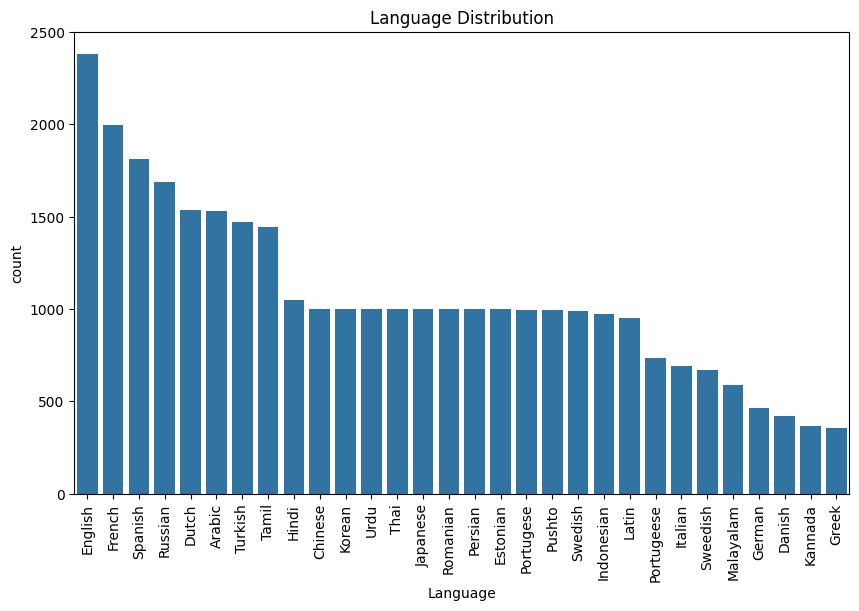

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.title('Language Distribution')
plt.xticks(rotation=90)
plt.show()

## 7. Correcting Language Labels
### Display and Update Unique Languages
Before and after correcting a typo in the language column (`Sweedish` → `Swedish`).

In [13]:
# Define the column name for languages
language_column = 'Language'

# Display unique languages in the dataset before updating
unique_languages_before = df[language_column].unique()
print("Unique languages in the dataset before updating:")
print(unique_languages_before)

# Correcting the spelling of specific language
df[language_column] = df[language_column].replace({'Sweedish': 'Swedish'})

# Display unique languages in the dataset after updating
unique_languages_after = df[language_column].unique()
print("Unique languages in the dataset after updating:")
print(unique_languages_after)

Unique languages in the dataset before updating:
['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic'
 'Malayalam' 'Portugeese' 'Greek' 'Danish' 'Italian' 'Sweedish' 'German'
 'Kannada']
Unique languages in the dataset after updating:
['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic'
 'Malayalam' 'Portugeese' 'Greek' 'Danish' 'Italian' 'German' 'Kannada']


## 8. Tokenizing and Padding Sequences
### Tokenizing Text
The `Tokenizer` from Keras is used to:

- Convert text to a sequence of integer tokens.
- Calculate the maximum sequence length for padding.

In [14]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
word_column = 'Cleaned_Text'

df = df[df[word_column].notna() & (df[word_column] != '')]

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df[word_column])

sequences = tokenizer.texts_to_sequences(df[word_column])


max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

# Print the first 5 padded sequences
print(padded_sequences[:5])

df['padded_sequences'] = list(padded_sequences)

[[ 36700 105773  17040 ...      0      0      0]
 [105787   2975  25327 ...      0      0      0]
 [ 65064  65065  65066 ...      0      0      0]
 [105799 105800  19174 ...      0      0      0]
 [     1  15332   5999 ...      0      0      0]]


## 9. Text Vectorization
### CountVectorizer
`CountVectorizer` transforms text data into numerical feature vectors, limited to 10,000 features.
The vectorizer is saved for reuse using `joblib`.

In [16]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Specify the column containing cleaned text
text_column = 'Cleaned_Text'

# Initialize CountVectorizer with a feature limit
vectorizer = CountVectorizer(max_features=10000)

# Transform the text column into feature vectors
features = vectorizer.fit_transform(df[text_column]).toarray()

# Save the vectorizer model for reuse
vectorizer_filename = 'lingual_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)

print(f"Vectorizer has been saved as '{vectorizer_filename}'")

Vectorizer has been saved as 'lingual_vectorizer.pkl'


## 10. Saving the Processed Dataset
The processed dataset is saved to `pre_processed_dataset.csv`.

In [18]:
# Transfer the contents of 'Cleaned_Text' to 'Text'
df['Text'] = df['Cleaned_Text']

# Drop the 'Cleaned_Text' column
df.drop(columns=['Cleaned_Text'], inplace=True)

# Save the updated dataset 
df.to_csv('pre_processed_dataset.csv', index=False)